In [263]:
#Dependencies
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [269]:
accident_df = pd.read_csv("traffic_accidents.csv")
accident_df['FIRST_OCCURENCE_DATE'] = pd.to_datetime(accident_df['FIRST_OCCURENCE_DATE'])
accident_df['YEAR'], accident_df['MONTH'], accident_df['HOUR'] = accident_df['FIRST_OCCURENCE_DATE'].dt.year, accident_df['FIRST_OCCURENCE_DATE'].dt.month, accident_df['FIRST_OCCURENCE_DATE'].dt.hour 
accident_df['OFFENSE_CATEGORY_ID'] = accident_df['OFFENSE_CATEGORY_ID'].apply(lambda x: x.strip())
accident_df.head()

C:\Users\Lindsay\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURENCE_DATE,LAST_OCCURENCE_DATE,REPORTED_DATE,...,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND,YEAR,MONTH,HOUR
0,200,2.012513e+09,201251274154010,5401,0,TRAF-HIT & RUN,TRAF - ACCIDENT - HIT & RUN,2012-11-02 18:20:00,None,2012-11-03 08:52:00,...,-105.052849,39.682112,4,421,Harvey Park,0,0,2012,11,18
1,201,2.012516e+09,201251634354410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2012-11-05 14:16:00,None,2012-11-05 15:12:00,...,-104.884786,39.653067,3,323,Hampden South,0,0,2012,11,14
2,203,2.012141e+09,201214081754010,5401,0,TRAF-HIT & RUN,TRAF - ACCIDENT - HIT & RUN,2012-04-02 17:00:00,None,2012-04-06 14:37:00,...,-104.986886,39.737147,6,623,Capitol Hill,0,0,2012,4,17
3,204,2.012253e+09,201225335454410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2012-06-11 17:05:00,None,2012-06-11 17:43:00,...,-104.979833,39.703898,3,311,Washington Park West,0,0,2012,6,17
4,206,2.012119e+09,201211878854410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2012-03-23 11:01:00,None,2012-03-23 11:10:00.000001,...,-105.014162,39.740439,1,121,Lincoln Park,0,0,2012,3,11


In [273]:
accidents_by_year = accident_df.groupby('YEAR')['OFFENSE_ID'].count().reset_index()
accidents_by_year = accidents_by_year.rename(columns={'OFFENSE_ID': 'TOTAL_ACCIDENTS'})
accidents_by_year

,YEAR,TOTAL_ACCIDENTS
0,2012,20560
1,2013,21182
2,2014,22444
3,2015,23842
4,2016,24254
5,2017,24616
6,2018,11861


In [26]:
accident_df.groupby(['year','NEIGHBORHOOD_ID']).OFFENSE_ID.count()

year  NEIGHBORHOOD_ID             
2012  Athmar Park                      239
      Auraria                          175
      Baker                           1062
      Barnum                           234
      Barnum West                      153
      Bear Valley                       99
      Belcaro                          199
      Berkeley                         197
      CBD                              436
      Capitol Hill                     738
      Chaffee Park                      82
      Cheesman Park                    293
      Cherry Creek                     453
      City Park                        162
      City Park West                   222
      Civic Center                     321
      Clayton                           81
      Cole                              78
      College View - South Platte      170
      Congress Park                    404
      Cory - Merrill                   167
      Country Club                      74
      DIA          

In [43]:
census_df = pd.read_csv("census_neighborhood_demographics_2010.csv")
census_df.head()


,NBHD_ID,NBRHD_NAME,POPULATION_2010,HISPANIC_2010,WHITE_2010,BLACK_2010,NATIVEAM_2010,ASIAN_2010,HAWPACIS_2010,OTHER_2010,...,RENTED_AGE_25_TO_34,RENTED_AGE_35_TO_44,RENTED_AGE_45_TO_54,RENTED_AGE_55_TO_59,RENTED_AGE_60_TO_64,RENTED_AGE_65_TO_74,RENTED_AGE_75_TO_84,RENTED_AGE_85_PLUS,SHAPE_Length,SHAPE_Area
0,32,Hampden,17547,2505,11750,1963,64,726,20,38,...,1363,791,700,304,253,285,200,229,0.200466,0.000768
1,3,Baker,4879,1664,2854,144,43,52,10,7,...,486,235,231,113,64,82,23,7,0.101767,0.000406
2,70,Washington Park,6905,295,6356,28,9,119,3,13,...,329,132,70,31,36,27,6,21,0.090445,0.000411
3,13,Cherry Creek,5589,332,4896,79,17,168,4,3,...,521,261,211,79,92,161,224,207,0.063923,0.000228
4,22,Country Club,3001,94,2740,20,8,77,1,5,...,90,55,34,14,17,9,4,2,0.052865,0.000177


In [302]:
accidents_by_hood = accident_df.groupby(['NEIGHBORHOOD_ID']).OFFENSE_ID.count().reset_index()
accidents_by_hood = accidents_by_hood.rename(columns={'OFFENSE_ID': 'TOTAL_ACCIDENTS'})
accidents_by_hood = pd.merge(accidents_by_hood, census_df[['NBRHD_NAME','POPULATION_2010']], left_on='NEIGHBORHOOD_ID', right_on='NBRHD_NAME')
accidents_by_hood = accidents_by_hood.drop('NBRHD_NAME', axis=1)
accidents_by_hood['ACCIDENTS_PER_PERSON'] = accidents_by_hood['TOTAL_ACCIDENTS']/accidents_by_hood['POPULATION_2010']
accidents_by_hood.head()
#accidents_by_hood['population'] = census_df.loc[accidents_by_hood[]
#accidents_by_hood.nlargest(20).reset_index()

,NEIGHBORHOOD_ID,TOTAL_ACCIDENTS,POPULATION_2010,ACCIDENTS_PER_PERSON
0,Athmar Park,1719,8898,0.193189
1,Auraria,1285,705,1.822695
2,Baker,7221,4879,1.480016
3,Barnum,1812,6111,0.296514
4,Barnum West,1003,5376,0.186570


In [ ]:
accidents_by_hood

In [307]:
neighborhood_df = pd.read_csv("neighborhood_regions.csv")
accidents_by_hood = pd.merge(accidents_by_hood, neighborhood_df, left_on="NEIGHBORHOOD_ID", right_on="NEIGHBORHOOD")
accidents_by_hood.head()

,NEIGHBORHOOD_ID,TOTAL_ACCIDENTS,POPULATION_2010,ACCIDENTS_PER_PERSON,NEIGHBORHOOD,DENVER_REGION
0,Athmar Park,1719,8898,0.193189,Athmar Park,West
1,Auraria,1285,705,1.822695,Auraria,Northwest
2,Baker,7221,4879,1.480016,Baker,Central
3,Barnum,1812,6111,0.296514,Barnum,West
4,Barnum West,1003,5376,0.186570,Barnum West,West


In [315]:
sorted_accidents_by_hood = accidents_by_hood.sort_values(by='ACCIDENTS_PER_PERSON', ascending=False)
sorted_accidents_by_hood.head(10)

,NEIGHBORHOOD_ID,TOTAL_ACCIDENTS,POPULATION_2010,ACCIDENTS_PER_PERSON,NEIGHBORHOOD,DENVER_REGION
21,DIA,2156,1165,1.850644,DIA,Northeast
1,Auraria,1285,705,1.822695,Auraria,Northwest
15,Civic Center,2372,1577,1.504122,Civic Center,Central
2,Baker,7221,4879,1.480016,Baker,Central
26,Globeville,3668,3687,0.994847,Globeville,North
8,CBD,3080,3648,0.844298,CBD,Central
47,Overland,1835,2218,0.827322,Overland,South
36,Jefferson Park,2063,2552,0.808386,Jefferson Park,Northwest
38,Lincoln Park,4353,6119,0.711391,Lincoln Park,Central
58,Sun Valley,1028,1448,0.709945,Sun Valley,West


In [311]:
accidents_by_hood.groupby('DENVER_REGION')['TOTAL_ACCIDENTS'].sum()

DENVER_REGION
Central      39471
East         15917
North        16122
Northeast    16894
Northwest    14004
South        12010
Southeast     9950
Southwest     4815
West         15750
Name: TOTAL_ACCIDENTS, dtype: int64

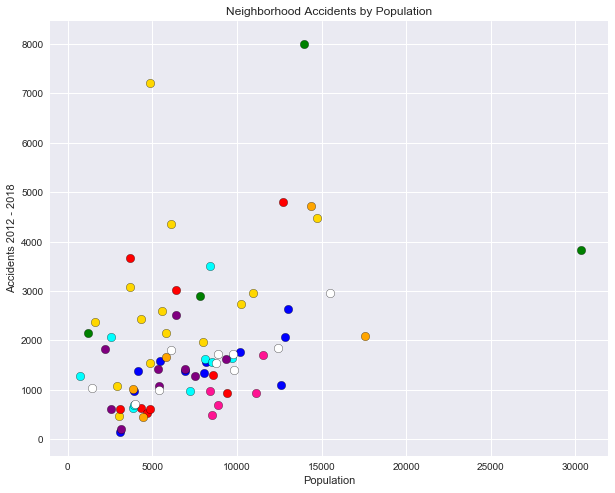

In [287]:
central_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Central']
east_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'East']
north_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'North']
northeast_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Northeast']
northwest_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Northwest']
south_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'South']
southeast_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Southeast']
southwest_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Southwest']
west_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'West']

sns.set()
plt.figure(figsize=(10,8))

central_plot = plt.scatter(central_data['POPULATION_2010'], central_data['TOTAL_ACCIDENTS'], c='gold', s=70, edgecolor='black')
east_plot = plt.scatter(east_data['POPULATION_2010'], east_data['TOTAL_ACCIDENTS'], c='blue', s=70, edgecolor='black')
north_plot = plt.scatter(north_data['POPULATION_2010'], north_data['TOTAL_ACCIDENTS'], c='red', s=70, edgecolor='black')
northeast_plot = plt.scatter(northeast_data['POPULATION_2010'], northeast_data['TOTAL_ACCIDENTS'], c='green', s=70, edgecolor='black')
nortwest_plot = plt.scatter(northwest_data['POPULATION_2010'], northwest_data['TOTAL_ACCIDENTS'], c='cyan', s=70, edgecolor='black')
south_plot = plt.scatter(south_data['POPULATION_2010'], south_data['TOTAL_ACCIDENTS'], c='purple', s=70, edgecolor='black')
southeast_plot = plt.scatter(southeast_data['POPULATION_2010'], southeast_data['TOTAL_ACCIDENTS'], c='orange', s=70, edgecolor='black')
southwest_plot = plt.scatter(southwest_data['POPULATION_2010'], southwest_data['TOTAL_ACCIDENTS'], c='deeppink', s=70, edgecolor='black')
west_plot = plt.scatter(west_data['POPULATION_2010'], west_data['TOTAL_ACCIDENTS'], c='white', s=70, edgecolor='black')
#plt.scatter(accidents_by_hood['POPULATION_2010'], accidents_by_hood['ACCIDENT_COUNT'])

plt.xlabel('Population')
plt.ylabel('Accidents 2012 - 2018')
plt.title ('Neighborhood Accidents by Population')

plt.show()

In [297]:
accidents_by_month = accident_df.loc[accident_df['YEAR'] < 2018] #Get rid of 2018 data so as not to skew
num_years = accidents_by_month['YEAR'].max() - accidents_by_month['YEAR'].min()
accidents_by_month = accidents_by_month.groupby(['MONTH']).OFFENSE_ID.count().reset_index()
accidents_by_month = accidents_by_month.rename(columns={'OFFENSE_ID': "ACCIDENT_COUNT"})
accidents_by_month['AVG_ACC_PER_YEAR'] = accidents_by_month['ACCIDENT_COUNT']/num_years
accidents_by_month = accidents_by_month.rename(index={'1': 'January'})
accidents_by_month = accidents_by_month.replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8:'August', 9:'September', 10: 'October', 11: 'November', 12: 'December'})
accidents_by_month

,MONTH,ACCIDENT_COUNT,AVG_ACC_PER_YEAR
0,January,11347,2269.4
1,February,10468,2093.6
2,March,10653,2130.6
3,April,10907,2181.4
4,May,11833,2366.6
5,June,11738,2347.6
6,July,10127,2025.4
7,August,11972,2394.4
8,September,12121,2424.2
9,October,12531,2506.2


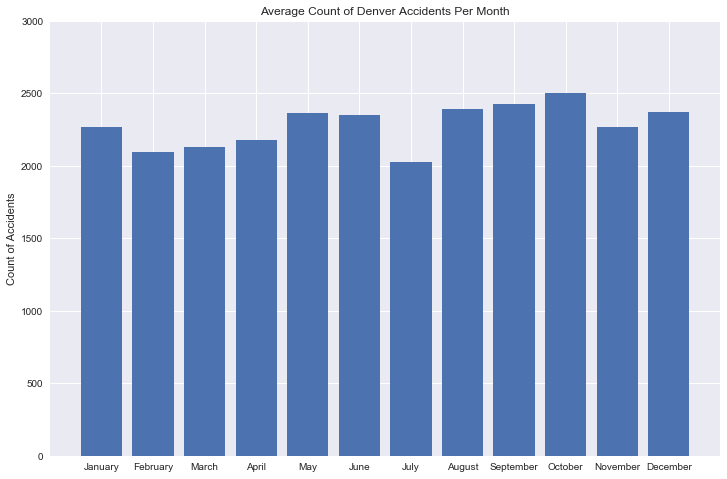

In [298]:
plt.figure(figsize=(12,8))
x_axis = accidents_by_month.index
y_axis = accidents_by_month['AVG_ACC_PER_YEAR']
plt.bar(x_axis, y_axis)
tick_locations = [x for x in accidents_by_month.index]
x_labels = accidents_by_month.MONTH
#x_labels = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 
          # 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(tick_locations, x_labels)

plt.title ('Average Count of Denver Accidents Per Month')
plt.ylabel('Count of Accidents')
plt.ylim(0, 3000)

plt.show()

In [299]:
accidents_by_hour = accident_df.loc[accident_df['YEAR'] < 2018] #Get rid of 2018 data so as not to skew
num_years = accidents_by_hour['YEAR'].max() - accidents_by_hour['YEAR'].min()
accidents_by_hour = accidents_by_hour.groupby(['HOUR']).OFFENSE_ID.count().reset_index()
accidents_by_hour= accidents_by_hour.rename(columns={'OFFENSE_ID': "ACCIDENT_COUNT"})
accidents_by_hour['AVG_ACC_PER_YEAR'] = accidents_by_hour['ACCIDENT_COUNT']/num_years
#accidents_by_month = accidents_by_month.rename(index={'1': 'January'})
#accidents_by_month = accidents_by_month.replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8:'August', 9:'September', 10: 'October', 11: 'November', 12: 'December'})
accidents_by_hour.head()

,HOUR,ACCIDENT_COUNT,AVG_ACC_PER_YEAR
0,0,2429,485.8
1,1,2408,481.6
2,2,2826,565.2
3,3,1180,236.0
4,4,885,177.0


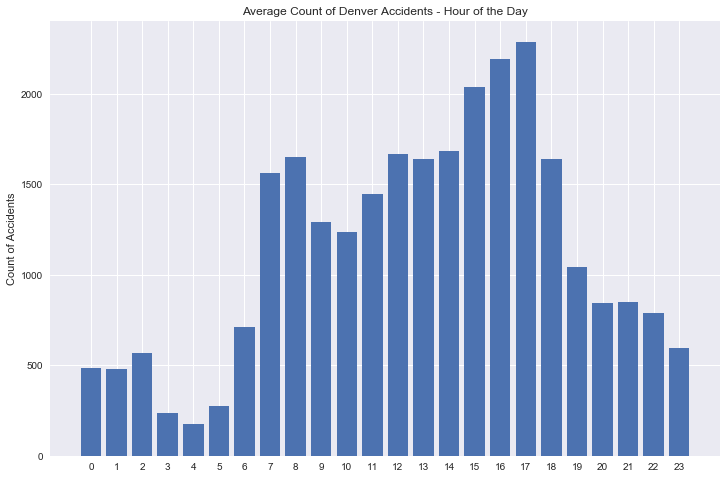

In [301]:
plt.figure(figsize=(12,8))
x_axis = accidents_by_hour.index
y_axis = accidents_by_hour['AVG_ACC_PER_YEAR']
plt.bar(x_axis, y_axis)
tick_locations = [x for x in accidents_by_hour.index]
x_labels = accidents_by_hour.HOUR
#x_labels = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 
          # 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(tick_locations, x_labels)

plt.title ('Average Count of Denver Accidents - Hour of the Day')
plt.ylabel('Count of Accidents')
#plt.ylim(0, 3000)

plt.show()

In [200]:
bike_accs_df = accident_df.loc[accident_df['year'] < 2018] #Get rid of 2018 data so as not to skew
num_years = bike_accs_df['year'].max() - bike_accs_df['year'].min()
bike_accs_df = bike_accs_df.groupby('NEIGHBORHOOD_ID')['BICYCLE_IND'].sum().reset_index()
bike_accs_df['AVG_ACCS_PER_YEAR'] = bike_accs_df['BICYCLE_IND']/num_years
bike_accs_df = bike_accs_df.sort_values(by='AVG_ACCS_PER_YEAR', ascending=False)
bike_accs_df.head(10)

,NEIGHBORHOOD_ID,BICYCLE_IND,AVG_ACCS_PER_YEAR
25,Five Points,130,26.0
9,Capitol Hill,109,21.8
8,CBD,95,19.0
63,Union Station,92,18.4
47,North Capitol Hill,88,17.6
15,Civic Center,76,15.2
40,Lincoln Park,73,14.6
11,Cheesman Park,62,12.4
35,Highland,61,12.2
59,Speer,58,11.6


In [201]:
ped_accs_df = accident_df.loc[accident_df['year'] < 2018] #Get rid of 2018 data so as not to skew
num_years = ped_accs_df['year'].max() - ped_accs_df['year'].min()
ped_accs_df = ped_accs_df.groupby('NEIGHBORHOOD_ID')['PEDESTRIAN_IND'].sum().reset_index()
ped_accs_df['AVG_ACCS_PER_YEAR'] = ped_accs_df['PEDESTRIAN_IND']/num_years
ped_accs_df = ped_accs_df.sort_values(by='AVG_ACCS_PER_YEAR', ascending=False)
ped_accs_df.head(10)

,NEIGHBORHOOD_ID,PEDESTRIAN_IND,AVG_ACCS_PER_YEAR
9,Capitol Hill,203,40.6
63,Union Station,176,35.2
25,Five Points,159,31.8
8,CBD,129,25.8
15,Civic Center,106,21.2
76,Westwood,103,20.6
2,Baker,99,19.8
44,Montbello,89,17.8
11,Cheesman Park,86,17.2
60,Stapleton,86,17.2


In [156]:
offense_df = accident_df.groupby('OFFENSE_CATEGORY_ID')['OFFENSE_ID'].count()
offense_df.head()

OFFENSE_CATEGORY_ID
TRAF - ACCIDENT                   100870
TRAF - ACCIDENT - DUI/DUID          4658
TRAF - ACCIDENT - FATAL              301
TRAF - ACCIDENT - HIT & RUN        39472
TRAF - ACCIDENT - POLICE            1445
Name: OFFENSE_ID, dtype: int64

In [239]:
# mask = ['DUI/DUID' in x for x in accident_df['OFFENSE_CATEGORY_ID']]
dui_mask = accident_df['OFFENSE_CATEGORY_ID'] == 'TRAF - ACCIDENT - DUI/DUID'
dui_df = accident_df[dui_mask]
dui_df = dui_df.loc[dui_df['year'] < 2018]
num_years = dui_df['year'].max() - dui_df['year'].min()
dui_df = dui_df.groupby('NEIGHBORHOOD_ID')['OFFENSE_ID'].count().reset_index()
dui_df = dui_df.rename(columns={'OFFENSE_ID': 'DUI_COUNT'})
dui_df['AVG_DUI_YR'] = dui_df['DUI_COUNT']/num_years
dui_df = dui_df.sort_values(by='DUI_COUNT', ascending=False)
dui_df.head(10)

#ped_accs_df['AVG_ACCS_PER_YEAR'] = ped_accs_df['PEDESTRIAN_IND']/(2017-2012)
#ped_accs_df = ped_accs_df.sort_values(by='AVG_ACCS_PER_YEAR', ascending=False)

,NEIGHBORHOOD_ID,DUI_COUNT,AVG_DUI_YR
60,Stapleton,189,37.8
2,Baker,156,31.2
25,Five Points,151,30.2
9,Capitol Hill,151,30.2
40,Lincoln Park,140,28.0
28,Globeville,139,27.8
76,Westwood,130,26.0
44,Montbello,125,25.0
35,Highland,114,22.8
32,Hampden South,108,21.6


In [238]:
fatal_mask = accident_df['OFFENSE_CATEGORY_ID'] == 'TRAF - ACCIDENT - FATAL'
fatal_df = accident_df[fatal_mask]
fatal_df = fatal_df.loc[fatal_df['year']<2018]
num_years = fatal_df['year'].max() - fatal_df['year'].min()
fatal_df = fatal_df.groupby('NEIGHBORHOOD_ID')['OFFENSE_ID'].count().reset_index()
fatal_df = fatal_df.rename(columns={'OFFENSE_ID': 'FATAL_COUNT'})
fatal_df['AVG_FATAL_YR'] = fatal_df['FATAL_COUNT']/num_years
fatal_df = fatal_df.sort_values(by='AVG_FATAL_YR', ascending=False)
fatal_df.head(10)

,NEIGHBORHOOD_ID,FATAL_COUNT,AVG_FATAL_YR
52,Stapleton,18,3.6
68,Westwood,11,2.2
38,Lincoln Park,11,2.2
0,Athmar Park,8,1.6
26,Gateway - Green Valley Ranch,8,1.6
27,Globeville,8,1.6
42,Montbello,8,1.6
23,Elyria Swansea,8,1.6
51,Speer,7,1.4
40,Mar Lee,7,1.4


In [237]:
hr_mask = accident_df['OFFENSE_CATEGORY_ID'] == 'TRAF - ACCIDENT - HIT & RUN'
hr_df = accident_df[hr_mask]
hr_df = hr_df.loc[hr_df['year']<2018]
num_years = hr_df['year'].max() - hr_df['year'].min()
hr_df = hr_df.groupby('NEIGHBORHOOD_ID')['OFFENSE_ID'].count().reset_index()
hr_df = hr_df.rename(columns={'OFFENSE_ID': 'HIT_RUN_COUNT'})
hr_df['AVG_HR_YR'] = hr_df['HIT_RUN_COUNT']/num_years
hr_df = hr_df.sort_values(by='AVG_HR_YR', ascending=False)
hr_df.head(10)

,NEIGHBORHOOD_ID,HIT_RUN_COUNT,AVG_HR_YR
2,Baker,1535,307.0
60,Stapleton,1532,306.4
25,Five Points,1284,256.8
9,Capitol Hill,1242,248.4
76,Westwood,1117,223.4
44,Montbello,1027,205.4
40,Lincoln Park,1011,202.2
35,Highland,846,169.2
63,Union Station,829,165.8
8,CBD,809,161.8
